# Fluidlab Procedure for Calibrating Micropipette Force Sensors
## August 2024

This jupyter notebook walks through how to calibrate micropipettes as precise force sensors.

Input data should have been extracted from ImageJ stacks of the experiment stored in the filepath given to the variable experiment_folder.

All calibration methods taken from the Nature protocols paper ["Micropipette force sensors for in vivo force measurements on single cells and multicellular microorganisms, Backholm and Bäumchen, 2019"](https://www.nature.com/articles/s41596-018-0110-x)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib as mpl
from matplotlib import rc
plt.style.use('default')
rc('font', **{'family':'sans-serif', 'sans-serif':['Arial'], 'size':16})
rc('text', usetex=False)
rc('axes', titlesize=18, labelsize=20)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

## Calibration by Droplet Evaporation
We will start by doing the calibration through the process of droplet evaporation (Step 9A in the paper).

### Inputs: 
- Size of the pipette tip (in $\mathrm{{\mu m}}$)
- filepath of the experimental run (experiment_folder) 
- pipette tip displacement data 
- droplet size data

The droplet is modeled as an ellipsoid, with volume
$$V = \frac{4}{3}\pi r_{\text{min}}r_{\text{min}}r_{\text{max}}$$
**Note** that this assumes that the two minor axes are equally long.

The weight of this droplet is then $F=\rho V g,$ where $\rho$ is the density of the liquid ($\rho = 0.9982$ g/mL for Milli-Q water at $\sim 20\degree \text{C}$). Plotting the weight of the droplet vs the deflection of the pipette, and fitting that to a straight line, the slope is the spring constant $k$ of the pipette. This allows that same pipette to be used for precision force sensor in future experiments.

In interpreting the pipette YM values (Y center of mass), note that decreasing YM means that the pipette tip is moving up, since (x,y) origin is top left corner of the image.

Note that the volume of the droplet estimated from my ImageJ macro may be systematically larger than the actual volume, since it doesn't subtract out the volume of the glass micropipette inside the drop (when the drop isn't clinging to one side of the pipette, but is wrapped around it). To account for this, I have some code that takes the major axis of the droplet as the height of the cylinder of the submerged pipette, and from there estimates the submerged volume. Then volume droplet = estimated ellipsoid volume-submerged pipette volume. Whether this calculation is done is toggled by the subtract_vol_bool Boolean variable in the code below, and entering the value of the pipette_tip_diamter in um.


### We start by importing the data, deciding whether to subtract the pipette volume, and calculating the droplet volume and weight

In [99]:
# Import data
pipette_tip_diameter = 33 # in um, CHANGES FOR DIFFERENT PIPETTES
experiment_folder = 'pip 0 calibration raw 05.03/cap1try8evapogood/'
pip_filename = 'pipette_deflection_um_scaled.csv' 
drop_filename = 'calibration_drop_size_um_scaled.csv'

pip_df = pd.read_csv(experiment_folder+pip_filename)
drop_df = pd.read_csv(experiment_folder+drop_filename)

# Subtract volume of pipette inside droplet? (Sometimes not necessary, since droplet clung onto outside of pipette)
subtract_vol_bool = False

# Droplet weight calculation
density = 998.2 # kg/m^3, value for Milli-Q water at 20C
g = 9.8 # m/s^2
rmin = drop_df['Minor']/2 # um, 'Minor' and 'Major' are the smallest and largest diameters of the fitted ellipse, so divide by 2 for the radii
rmax = drop_df['Major']/2

# Subtract pipette volume from droplet volume, if necessary
if subtract_vol_bool:
    V_pipette_um3 = (drop_df['Major'])*np.pi*(pipette_tip_diameter/2)**2
    Vdrop_um3 = (4/3)*np.pi*rmin*rmin*rmax-V_pipette_um3 # um^3
else:
    Vdrop_um3 = (4/3)*np.pi*rmin*rmin*rmax # um^3
Vdrop_SI = Vdrop_um3/1e18 # m^3
Fdrop_SI = np.array(density*g*Vdrop_SI) # N
Fdrop_uN = Fdrop_SI*1e6 # uN
print(Fdrop_uN)

[1.68696472 1.67064549 1.65198745 1.63254428 1.61209225 1.59738508
 1.57654473 1.55634493 1.54253317 1.51975607 1.50122141 1.48690476
 1.4692503  1.4550517  1.43360631 1.41575248 1.39807238 1.380456
 1.36117891 1.34116657 1.32521331 1.31125935 1.29151004 1.27331677
 1.25826502 1.24386965 1.22464379 1.20590702 1.19121243 1.17215687
 1.15687109 1.13887929 1.12037353 1.10717833 1.09058618 1.07661644
 1.06105432 1.04473468 1.0310813  1.01545462 0.99928861 0.98516912
 0.9699294  0.95869355 0.94571804 0.93326141 0.92135132 0.90923007
 0.89809955 0.88823771 0.8783419  0.86658303 0.85475418 0.84830125
 0.83688994 0.82727568 0.81651416 0.80372211 0.79495072 0.78400002
 0.77195031 0.76336774 0.75337231 0.74447159 0.73281941 0.722159
 0.70965517 0.70145344 0.69168514 0.68337926 0.67289999 0.66206987
 0.653895   0.64286092 0.632719   0.62192912 0.61513567 0.60513384
 0.59595292 0.58635636 0.57609915 0.56614906 0.55738263 0.55064538
 0.54030122 0.53328052 0.52250202 0.51153871 0.50601974 0.496636
 

### Now we do the calculation of the pipette deflection, and plot the droplet weight versus this pipette deflection

<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
C:\Users\jpopows\AppData\Local\Temp\ipykernel_9336\2227950451.py:40: SyntaxWarning: invalid escape sequence '\p'
  color='blue',label=f'$k={lm1.slope:.4f} \pm {ts*lm1.stderr:.4f} \mathrm{{\mu N/\mu m}}$')
C:\Users\jpopows\AppData\Local\Temp\ipykernel_9336\2227950451.py:40: SyntaxWarning: invalid escape sequence '\m'
  color='blue',label=f'$k={lm1.slope:.4f} \pm {ts*lm1.stderr:.4f} \mathrm{{\mu N/\mu m}}$')
C:\Users\jpopows\AppData\Local\Temp\ipykernel_9336\2227950451.py:40: SyntaxWarning: invalid escape sequence '\m'
  color='blue',label=f'$k={lm1.slope:.4f} \pm {ts*lm1.stderr:.4f} \mathrm{{\mu N/\mu m}}$')


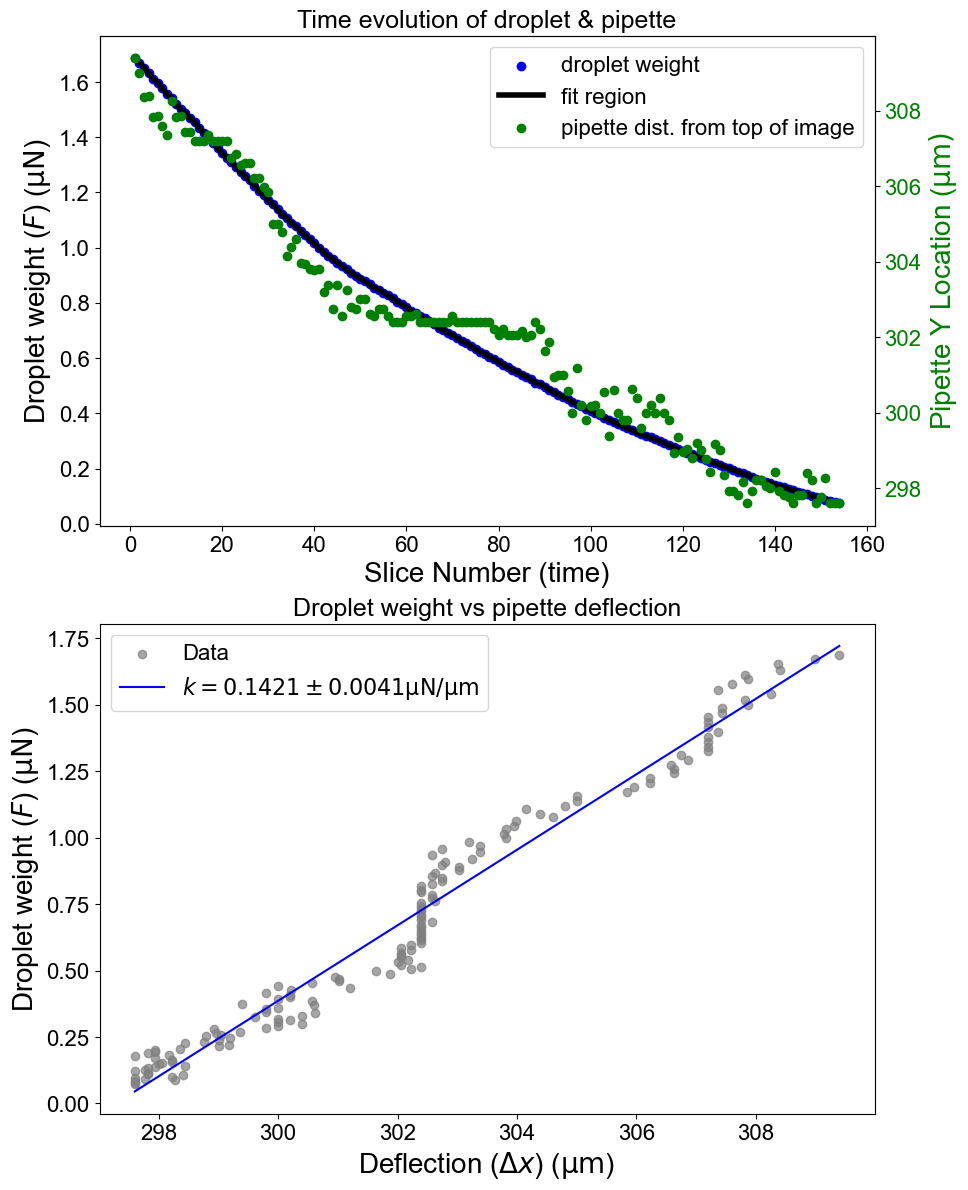

Pipette spring constant (and 95% confidence interval): 0.142113 +/- 0.004055 uN/um


In [100]:
# Pipette deflection calculation
slices = np.array(pip_df['Slice'])
Y_pip = np.array(pip_df['YM']) # center of mass position of the tip

## SELECT RANGE OF SLICES TO FIT WEIGHT-DISPLACEMENT CURVE OVER! (DEPENDS ON EXPERIMENT)
lower_sliceid = 0
upper_sliceid = slices[-1]

# Linear fit of droplet weight vs pip deflection data
lm1 = stats.linregress(Y_pip[lower_sliceid:upper_sliceid], Fdrop_uN[lower_sliceid:upper_sliceid]) # restrict data range if necessary

# Calculate 95% confidence interval on the fitted slope for error value
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df)) # Two-sided inverse Students t-distribution. Here p=probability, df=degrees of freedom
ts = tinv(0.05, len(Y_pip[lower_sliceid:upper_sliceid])-2)

# Plot the data and linear fit
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))
drop_color = 'blue'
ax1.scatter(slices, Fdrop_uN, label='droplet weight', color=drop_color)
ax1.plot(slices[lower_sliceid:upper_sliceid], Fdrop_uN[lower_sliceid:upper_sliceid], label='fit region', color='black', linewidth=4)
ax1.set_xlabel('Slice Number (time)')
ax1.set_ylabel(r'Droplet weight ($F$) ($\mathrm{{\mu N}}$)')

# Create a twin axis for the pipette center of mass data
ax1_twin = ax1.twinx()
pip_color='green'
ax1_twin.scatter(slices, Y_pip, label = 'pipette dist. from top of image', color=pip_color)
ax1_twin.set_ylabel(r'Pipette Y Location ($\mathrm{{\mu m}})$', color=pip_color)
ax1_twin.tick_params(axis='y', labelcolor=pip_color)

# Combine legends, add to ax1
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)
ax1.set_title('Time evolution of droplet & pipette')

ax2.scatter(Y_pip[lower_sliceid:upper_sliceid], Fdrop_uN[lower_sliceid:upper_sliceid], alpha=0.7, color='gray', label='Data')
ax2.plot(Y_pip[lower_sliceid:upper_sliceid], lm1.intercept + lm1.slope * Y_pip[lower_sliceid:upper_sliceid], 
         color='blue',label=f'$k={lm1.slope:.4f} \pm {ts*lm1.stderr:.4f} \mathrm{{\mu N/\mu m}}$')
ax2.set_xlabel(r'Deflection ($\Delta x$) ($\mathrm{{\mu m}}$)')
ax2.set_ylabel(r'Droplet weight ($F$) ($\mathrm{{\mu N}}$)')
ax2.set_title('Droplet weight vs pipette deflection')
ax2.legend()
#plt.savefig(experiment_folder+'pip_calibration_figure.pdf')
plt.show()

print(f"Pipette spring constant (and 95% confidence interval): {lm1.slope:.6f} +/- {ts*lm1.stderr:.6f} uN/um")


# Two-Pipette Calibration Method
Once you have a nice calibrated pipette (spring constant $k_c$) using the above droplet evaporation method, you can use it to calibrate other newly manufactured pipettes by deflecting them and measuring the forces (Step 9B in the paper). 

### Inputs: 
- $k_c$, the spring constant of the calibrated pipette (in $\mathrm{{\mu N/\mu m}}$ or whatever equivalent)
- filepath of the experimental run (experiment_folder) 
- calibrated pipette tip displacement data 
- uncalibrated pipette tip displacement data

The basic procedure is as follows:

1. Measure delections of both pipettes at the tips while they press against each other, $\geq 5$ repetitions for good sample size. Measurements should occur over constant speed deflections.
2. Plot position of calibrated pipette vs time. You should see two regions in the plot over the experiment, one prior to contact in which the pipette moves down quickly and freely and a slower region in which the pipette has made contact with the other pipette and both are deflecting. Call these regions I and II, respectively. You will need to slice the data to select only these two regions of interest over the experiment as a whole.
3. Project a linear fit of the data in Region I into Region II. Calculate $\Delta x_{c}(t)=|x_{\text{measured},c}(t)-x_{\text{projected},c}(t)|.$
4. Plot $F_{c}=k_{c}\Delta{x_{c}}$ versus $x_u$ (uncalibrated pipette tip displacement). Do a linear fit to this data, and the slope is the desired spring constant $k_u$ for the uncalibrated pipette.

If you have the pipette calibration data from Step 1 (using ImageJ macros to get pipette deflections), then you can use the block of code below to do Step 2.

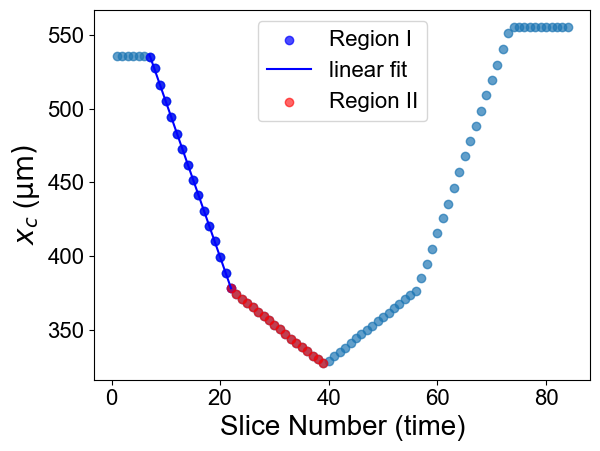

In [57]:
# Import data
k_c = 0.091228 # uN/um
experiment_folder = 'pip 4 calibration raw 27.03 bent/pip4_cal5/'
calpip_filename = 'calibrated_pipette_um_scaled.csv' # calibrated pipette center of mass motion
newpip_filename = 'uncalibrated_pipette_um_scaled.csv'

calpip_df = pd.read_csv(experiment_folder+calpip_filename)
newpip_df = pd.read_csv(experiment_folder+newpip_filename)

slice = np.array(calpip_df['Slice'])
calpip_ym = np.array(calpip_df['YM']) # center of mass position of the tip

# Define the two regimes for pipette displacement data (pre- and post-contact).
ft_range1 = (7, 22) # this range should end at the moment the slope changes, when contact occurs
fm_range2 = (22, 39) # this range should end on the slice number just before the deflection stops increasing

data_range1 = calpip_df[(calpip_df['Slice'] >= ft_range1[0]) & (calpip_df['Slice'] <= ft_range1[1])]
data_range2 = calpip_df[(calpip_df['Slice'] >= fm_range2[0]) & (calpip_df['Slice'] <= fm_range2[1])]
newpip_range2 = newpip_df[(newpip_df['Slice'] >= fm_range2[0]) & (newpip_df['Slice'] <= fm_range2[1])] # new pipette data in Region II

# Make linear regression model for data in region 1
lm2 = stats.linregress(data_range1['Slice'], data_range1['YM'])

# Plot the data for region 2 in red and the linear regression for region 1 in blue
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(slice, calpip_ym, alpha=0.7)
ax1.scatter(data_range1['Slice'], data_range1['YM'], color='blue', alpha=0.7, label='Region I')
ax1.plot(data_range1['Slice'], lm2.intercept + lm2.slope * data_range1['Slice'], color='blue', label='linear fit')
ax1.scatter(data_range2['Slice'], data_range2['YM'], alpha=0.6, color='red', label='Region II')
ax1.set_xlabel('Slice Number (time)')
ax1.set_ylabel(r'$x_c$ ($\mathrm{{\mu m}})$')
ax1.legend()

Once you've properly selected Regions I and II, the following code block implements Steps 3 and 4 listed above.

max deflection is 129.09290636017352 um, max force is 11.77688766142591 uN.


<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
C:\Users\jpopows\AppData\Local\Temp\ipykernel_29352\1025418892.py:26: SyntaxWarning: invalid escape sequence '\p'
  ax1.plot(newpip_ym, lm3.intercept + lm3.slope * newpip_ym, label=f'$k={np.abs(lm3.slope):.4f} \pm {ts*lm3.stderr:.4f} \mathrm{{\mu N/\mu m}}$')
C:\Users\jpopows\AppData\Local\Temp\ipykernel_29352\1025418892.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax1.plot(newpip_ym, lm3.intercept + lm3.slope * newpip_ym, label=f'$k={np.abs(lm3.slope):.4f} \pm {ts*lm3.stderr:.4f} \mathrm{{\mu N/\mu m}}$')
C:\Users\jpopows\AppData\Local\Temp\ipykernel_29352\1025418892.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax1.plot(newpip_ym, lm3.intercept + lm3.slope * newpip_ym,

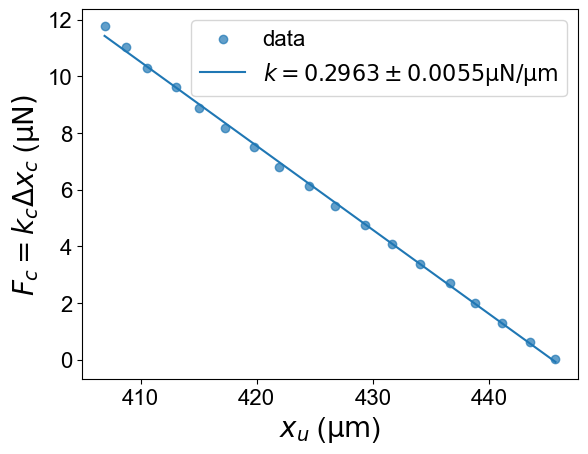

Pipette spring constant (and 95% confidence interval): 0.296279 +/- 0.005517 uN/um


In [60]:
# Project linear fit of Region I into Region II
projected_lm2_vals = lm2.intercept + lm2.slope * data_range2['Slice']
measured_vals = data_range2['YM']

# Actual pipette deflection is absolute value of the difference between projected_lm1 and lm2 values
deltax_pip = np.abs(projected_lm2_vals - measured_vals) # um

# Calculate the force exerted by the calibrated pipette
F_c = k_c*deltax_pip # uN
print('max deflection is', np.max(deltax_pip), 'um, max force is', np.max(F_c), 'uN.')

# Get the uncalibrated pipette's deflection
newpip_ym = newpip_range2['YM']

# Make linear regression model between F_c and newpip_ym
lm3 = stats.linregress(newpip_ym, F_c)

# Calculate 95% confidence interval on the fitted slope for error value
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df)) # Two-sided inverse Students t-distribution. Here p=probability, df=degrees of freedom
ts = tinv(0.05, len(newpip_ym)-2)

# Plot F_c vs the uncalibrated deflection, alongside the linear regression model
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(newpip_ym, F_c, alpha=0.7, label = 'data')
ax1.plot(newpip_ym, lm3.intercept + lm3.slope * newpip_ym, label=f'$k={np.abs(lm3.slope):.4f} \pm {ts*lm3.stderr:.4f} \mathrm{{\mu N/\mu m}}$')
ax1.set_xlabel(r'$x_{u}$ ($\mathrm{{\mu m}}$)')
ax1.set_ylabel(r'$F_c=k_c \Delta x_c$ ($\mathrm{{\mu N}})$')
ax1.legend()
#plt.savefig(experiment_folder+'pip_calibration_figure.pdf')
plt.show()

print(f"Pipette spring constant (and 95% confidence interval): {np.abs(lm3.slope):.6f} +/- {ts*lm3.stderr:.6f} uN/um")